# General Description:

For CRDM

Plotting choice as a function of the lottery amount, subdivded by lottery probabilities and ambuguity levels.

Importing libraries and mounting Google Drive

In [478]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import os,sys
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [479]:
# split dataframe by gains/losses
def get_by_domain(df,domain='gain',task='crdm',verbose='False'):
    if verbose:
        print('Working on this domain: {}'.format(domain))
    # select by domain: gain/loss
    safe_col = '{}_sure_amt'.format(task)
    if domain=='gain':
        df = df.loc[df[safe_col]>0]
    elif domain=='loss':
        df = df.loc[df[safe_col]<0]
    return df

In [480]:
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

In [481]:
def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    if not os.path.exists(os.path.dirname(fn)):
        os.makedirs(os.path.dirname(fn))
    count_df.to_csv(fn)

In [482]:
def count_lott_p_sure_amt_amb(fn='',df=[]):
    if df.empty:
        df = pd.read_csv(fn)
        df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']
        #0's are now choosing immediate, 1 is choosing delay
        # df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
        # get unique amounts that are "task" trials
        df = get_by_domain(df,domain='gain',task='crdm',verbose=True)
    for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
        fn = os.path.join('csv','{}.csv'.format(col))
        tabulate_col(fn,df,col=col)

In [483]:
def drop_blank(df):
    df_len = df.shape[0]
    df['responded'] = df['crdm_choice'].notna()
    if not df['responded'].all():
        non_responses_nb = df['responded'].value_counts()[False]
        print('\n**WARNING** We dropped {0} of {1} non responses that were left blank'.format(non_responses_nb,df_len))
        df = df.loc[df['responded'],:].reset_index(drop=True)    
    return df
        

In [484]:
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

In [485]:
def plot_3D_choice(utility_dir,df,subj,trials='risky'):
    # cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']
    xcol = 'crdm_lott_amt'
    ycol = 'crdm_sure_amt'
    if trials=='risky':
        # select no ambiguous trials
        df = df.loc[df['crdm_amb_lev']==0]
        zcol = 'crdm_lott_p'
        zlabel = 'probability lottery'
    elif trials=='ambiguity':
        df = df.loc[df['crdm_amb_lev']>0]
        zcol = 'crdm_amb_lev'
        zlabel = 'ambiguity level'
    count_lott_p_sure_amt_amb(df=df)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xrange = (df[xcol].max() - df[xcol].min())
    x = np.arange(df[xcol].min(),df[xcol].max(),xrange/20.0)
    if df[ycol].unique().shape[0]==1:
        # only one choice for sure amount = 0.50
        yrange = 1.0
        y = np.arange(0,1,yrange/20.0)
    else:
        yrange = (df[ycol].max() - df[ycol].min())
        y = np.arange(df[ycol].min(),df[ycol].max(),yrange/20.0)
    xx, yy = np.meshgrid(x, y)
    for z in df[zcol].unique():
        zz = np.full(xx.shape,z)
        ax.plot_surface(xx,yy,zz,alpha=0.1,color='k')
    colors = ['b','r']
    labels = ['safe bet', 'lottery']
    for c in df['crdm_choice'].unique():
        ax.scatter(df.loc[(df['crdm_choice']==c),xcol],df.loc[(df['crdm_choice']==c),ycol],
                df.loc[(df['crdm_choice']==c),zcol],label=labels[int(c)],color=colors[int(c)])
        # zlabel = 'probability lottery'
    
    plt.xticks(np.arange(df[xcol].min(), df[xcol].max()+0.1*xrange, xrange/2.0))
    ax.set_zticks(df[zcol].unique().tolist())
    if df[ycol].unique().shape[0]==1:
        plt.yticks(np.arange(0, 1.1, yrange/2.0))
    else:
        plt.yticks(np.arange(df[ycol].min(), df[ycol].max()+0.1*yrange, yrange/2.0))
    ax.set_xlabel('lottery amount ($)')
    ax.view_init(elev=10,azim=-35)
    ax.set_ylabel('safe amount ($)')
    ax.set_zlabel(zlabel)
    ax.legend()
    plt.title('{} {}'.format(subj,trials))
    plt.gca().invert_xaxis()
    plt.tight_layout()
    fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_{}_choices.png'.format(subj,trials))
    if not os.path.exists(os.path.dirname(fig_fn)):
        os.makedirs(os.path.dirname(fig_fn))
    print("Saving to: {}".format(fig_fn))
    plt.savefig(fig_fn)
    plt.show()
    


/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0150/crdm/23_IDM_ado_0150_crdm.csv
Working on this domain: gain
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     30
1            2.0      2
2            2.5      3
3           11.5      1
4           12.0      1
5           12.5      3
6           45.5      1
7           47.5      1
8           49.5      1
9           50.0      2
Saving to: csv/crdm_lott_amt.csv


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0150/crdm/23_IDM_ado_0150_crdm_risky_choices.png


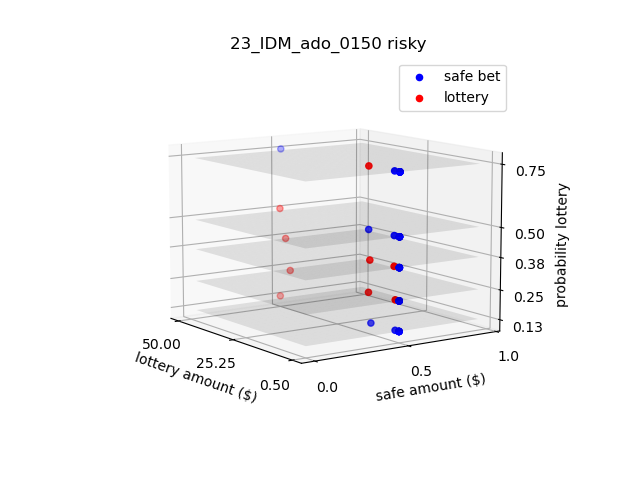

   crdm_sure_amt  count
0            0.5     27
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     27
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     18
1            2.5      3
2           11.5      1
3           12.5      1
4           13.0      1
5           47.5      2
6           50.0      1
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0150/crdm/23_IDM_ado_0150_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


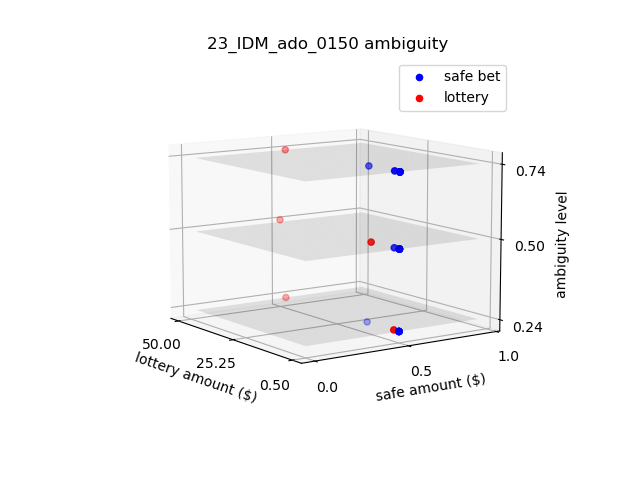

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0151/crdm/23_IDM_ado_0151_crdm.csv
Working on this domain: gain

**WARNING** We dropped 2 of 72 non responses that were left blank
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     30
1            2.0      1
2            2.5      3
3            3.0      1
4           11.0      1
5           12.0      4
6           48.0      1
7           48.5      1
8           50.0      3
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0151/crdm/23_IDM_ado_0151_crdm_risky_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


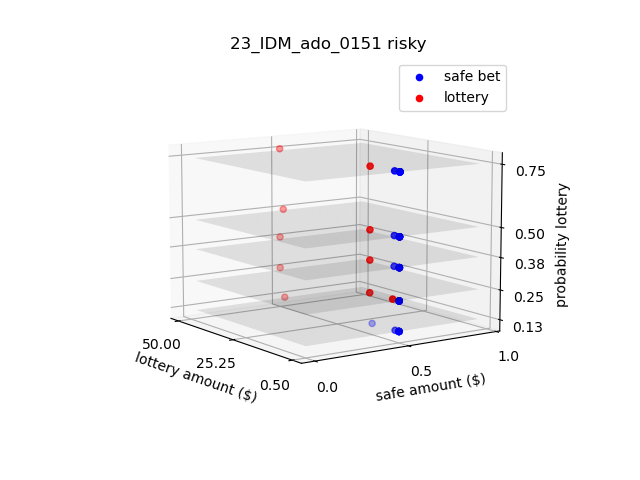

   crdm_sure_amt  count
0            0.5     25
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      8
2          0.74      8
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     25
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     16
1            2.5      3
2           12.5      1
3           13.0      1
4           13.5      1
5           47.5      2
6           48.5      1
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0151/crdm/23_IDM_ado_0151_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


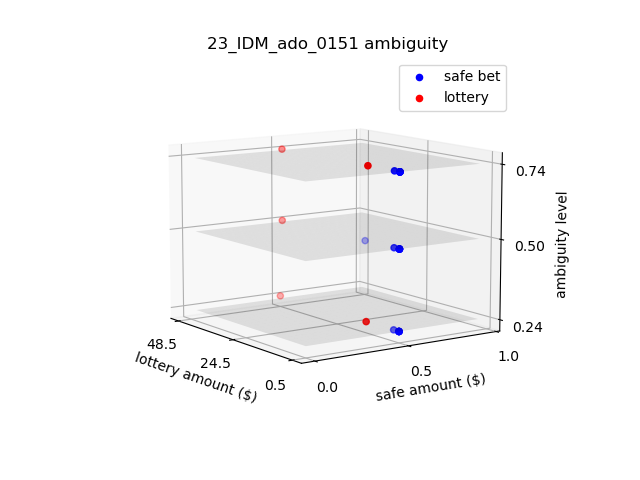

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0152/crdm/23_IDM_ado_0152_crdm.csv
Working on this domain: gain
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
    crdm_lott_amt  count
0             0.5     22
1             2.5      7
2             3.0      1
3             7.5      1
4             8.0      1
5             8.5      3
6            20.5      1
7            21.5      1
8            22.5      3
9            48.0      2
10           50.0      3
Saving to: csv/crdm_lott_amt.csv


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0152/crdm/23_IDM_ado_0152_crdm_risky_choices.png


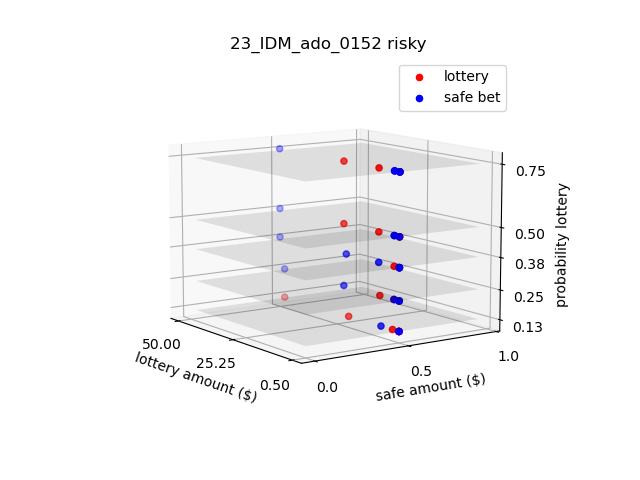

   crdm_sure_amt  count
0            0.5     27
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     27
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     13
1            2.5      5
2            8.5      3
3           22.0      1
4           22.5      2
5           50.0      3
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0152/crdm/23_IDM_ado_0152_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


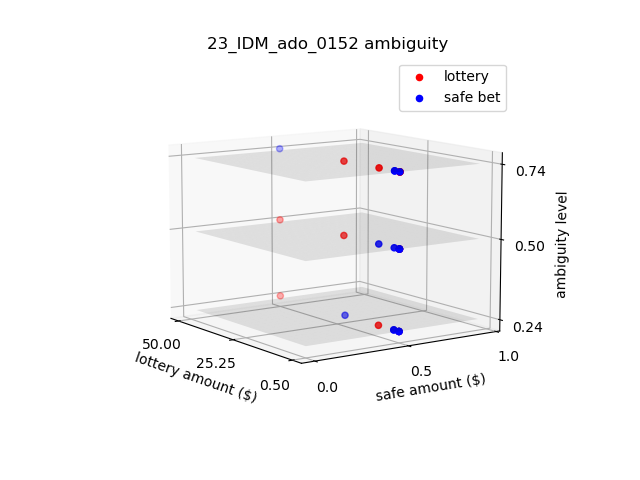

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0153/crdm/23_IDM_ado_0153_crdm.csv
Working on this domain: gain

**WARNING** We dropped 1 of 72 non responses that were left blank
   crdm_sure_amt  count
0            2.5      9
1            5.5      9
2            8.5      9
3           11.5      9
4           17.5      9
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5      5
1            6.0      5
2           13.0      5
3           20.0      9
4           27.5      6
5           35.0      5
6           42.5      5
7           50.0      5
Saving to: csv/crdm_lott_amt.csv


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0153/crdm/23_IDM_ado_0153_crdm_risky_choices.png


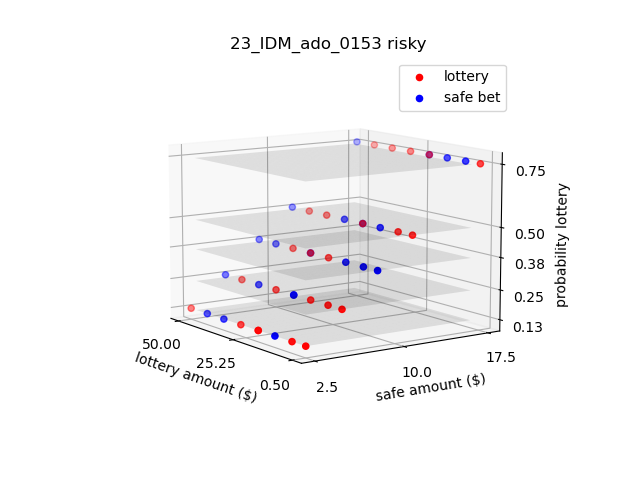

   crdm_sure_amt  count
0           11.5      8
1           12.0     18
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      8
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     26
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5      3
1            6.0      3
2           13.0      3
3           20.0      5
4           27.5      4
5           35.0      3
6           42.5      3
7           50.0      2
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0153/crdm/23_IDM_ado_0153_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


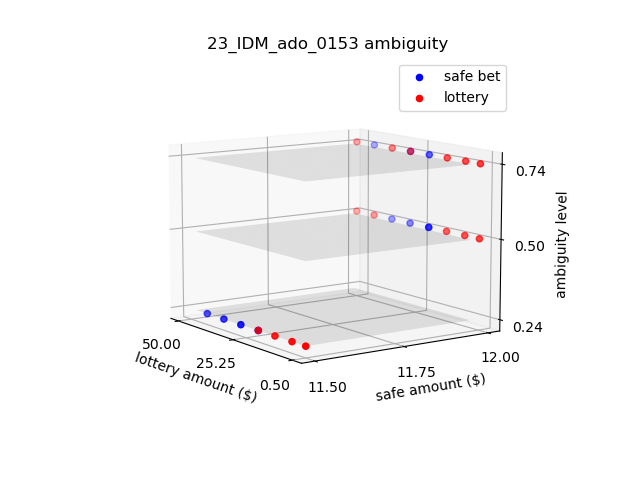

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0154/crdm/23_IDM_ado_0154_crdm.csv
Working on this domain: gain

**WARNING** We dropped 1 of 72 non responses that were left blank
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
    crdm_lott_amt  count
0             0.5     23
1             1.0      1
2             3.0      6
3             8.5      1
4             9.0      1
5             9.5      3
6            21.5      1
7            22.5      1
8            23.0      1
9            23.5      2
10           46.5      1
11           49.5      1
12           50.0      3
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0154/crdm/23_IDM_ado_0154_crdm_risky_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


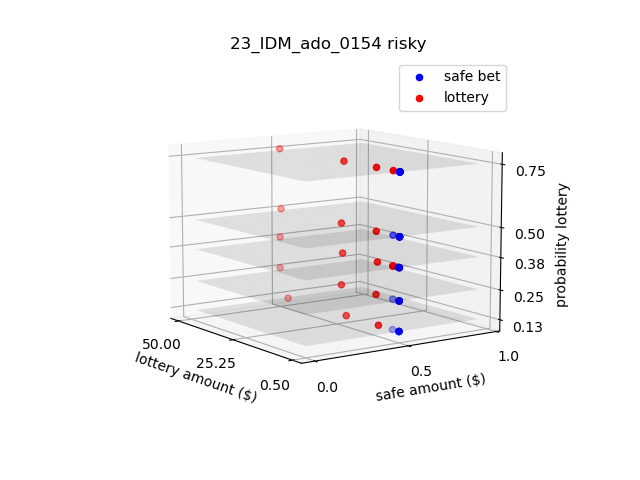

   crdm_sure_amt  count
0            0.5     26
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      8
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     26
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     10
1            1.0      1
2            3.0      6
3            9.0      3
4           22.5      1
5           23.0      2
6           49.0      1
7           50.0      2
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0154/crdm/23_IDM_ado_0154_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


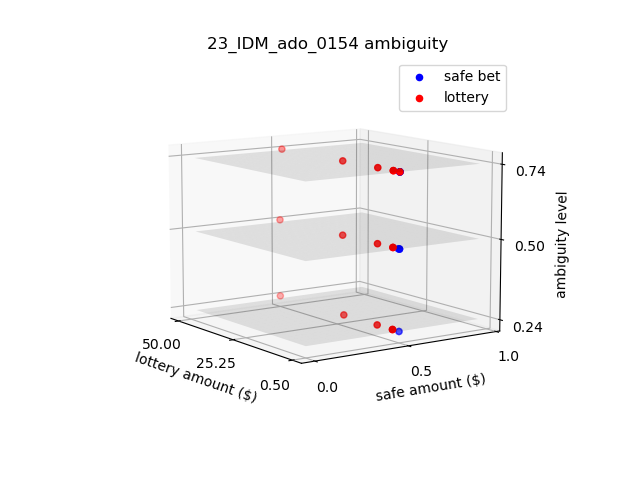

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0155/crdm/23_IDM_ado_0155_crdm.csv
Working on this domain: gain
   crdm_sure_amt  count
0            0.5     27
1            1.0      9
2            3.0      9
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     10
1            1.0      1
2            1.5      4
3            4.0      8
4            9.5      7
5           18.5      5
6           31.5      2
7           32.0      3
8           49.5      2
9           50.0      3
Saving to: csv/crdm_lott_amt.csv


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0155/crdm/23_IDM_ado_0155_crdm_risky_choices.png


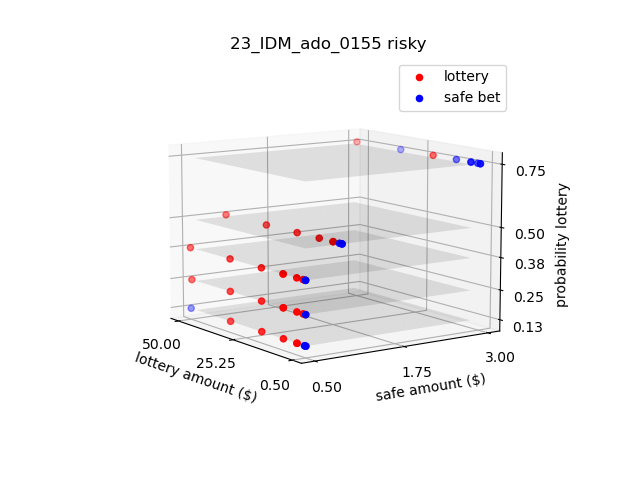

   crdm_sure_amt  count
0            1.5      9
1            2.5      9
2            3.5      9
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     27
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5      6
1            1.0      3
2            4.0      4
3            9.5      5
4           18.5      3
5           31.5      2
6           32.0      1
7           50.0      3
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0155/crdm/23_IDM_ado_0155_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


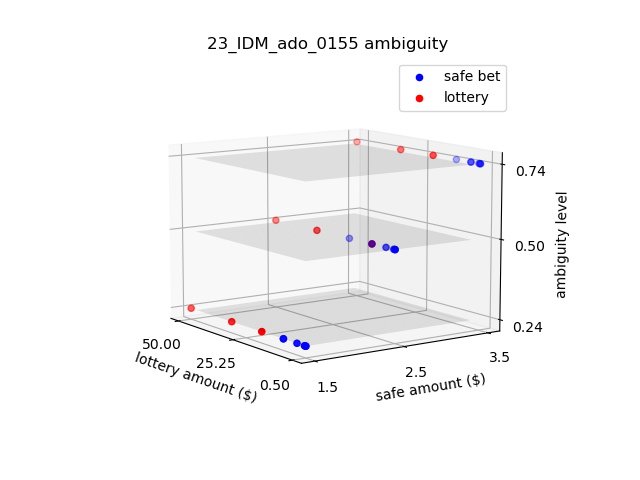

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0156/crdm/23_IDM_ado_0156_crdm.csv
Working on this domain: gain
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
    crdm_lott_amt  count
0             0.5     16
1             1.0      4
2             3.0      2
3             3.5      8
4            10.0      4
5            10.5      1
6            23.5      1
7            24.0      3
8            24.5      1
9            49.5      1
10           50.0      4
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0156/crdm/23_IDM_ado_0156_crdm_risky_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


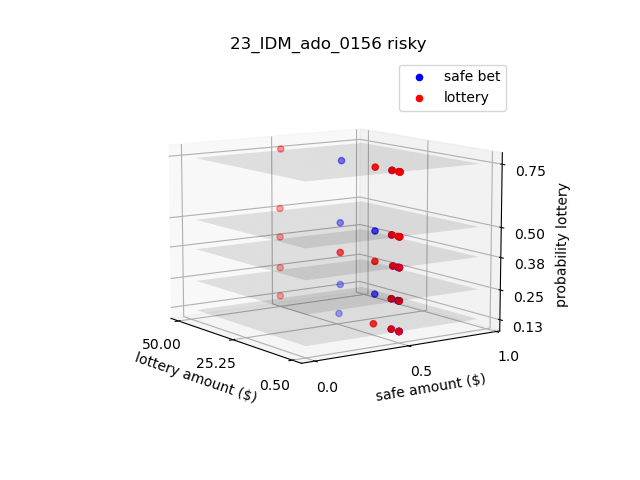

   crdm_sure_amt  count
0            0.5     27
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     27
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5      9
1            1.0      4
2            3.5      5
3            9.5      2
4           10.0      1
5           23.5      1
6           24.0      2
7           49.5      1
8           50.0      2
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0156/crdm/23_IDM_ado_0156_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


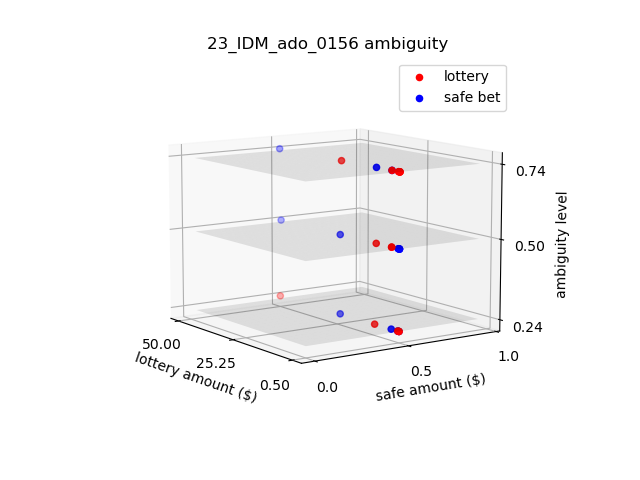

/Volumes/UCDN/datasets/IDM_ado/split/23_IDM_ado_0157/crdm/23_IDM_ado_0157_crdm.csv
Working on this domain: gain
   crdm_sure_amt  count
0            0.5     45
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     45
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         0.13      9
1         0.25      9
2         0.38      9
3         0.50      9
4         0.75      9
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     30
1            2.0      1
2            2.5      3
3            3.0      1
4           11.0      1
5           11.5      1
6           12.0      3
7           47.5      1
8           48.0      1
9           50.0      3
Saving to: csv/crdm_lott_amt.csv


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0157/crdm/23_IDM_ado_0157_crdm_risky_choices.png


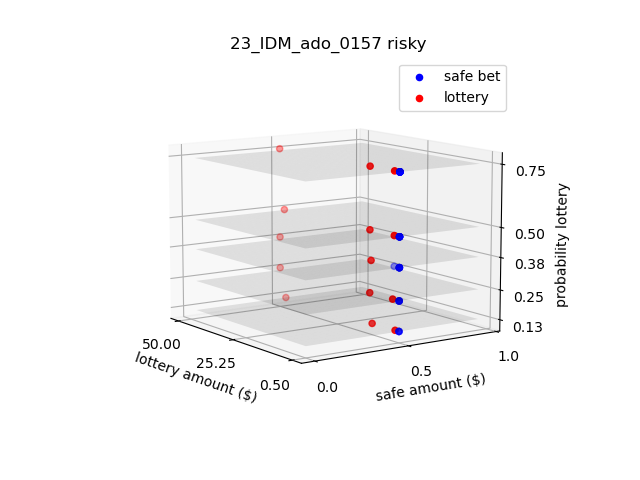

   crdm_sure_amt  count
0            0.5     27
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0          0.24      9
1          0.50      9
2          0.74      9
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0          0.5     27
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0            0.5     18
1            2.0      1
2            2.5      2
3           11.5      1
4           13.5      1
5           14.0      1
6           48.0      1
7           50.0      2
Saving to: csv/crdm_lott_amt.csv
Saving to: /Volumes/UCDN/datasets/IDM_ado/utility/23_IDM_ado_0157/crdm/23_IDM_ado_0157_crdm_ambiguity_choices.png


/var/folders/ny/z8kv5qp97sgdddh2mgc5yr7c0000gs/T/ipykernel_15734/874665756.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


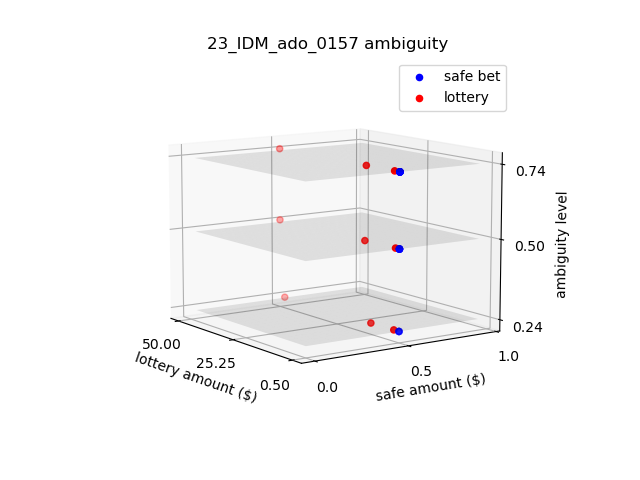

In [486]:
split_dir = '/Volumes/UCDN/datasets/IDM_ado/split/'
utility_dir = '/Volumes/UCDN/datasets/IDM_ado/utility/'

cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, '*/crdm/*.csv')))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()

fn_list = sorted(glob(os.path.join(split_dir,'*/crdm/*.csv')))

for idx, subj_fn in enumerate(fn_list):
    subj=os.path.basename(subj_fn).replace('_crdm.csv','')
    # count_lott_p_sure_amt_amb(subj_fn)
    domain = 'gain'
    print(subj_fn)
    df = pd.read_csv(subj_fn)
    df = get_by_domain(df,domain=domain,task='crdm',verbose=True)
    df = drop_blank(df)
    df['crdm_lott_amt'] = df['crdm_lott_top'] + df['crdm_lott_bot']

    plot_3D_choice(utility_dir,df,subj,trials='risky')
    plot_3D_choice(utility_dir,df,subj,trials='ambiguity')



In [487]:
# def plot_2d_choice(idx,df,subj_fn,utility_dir,domain):
#     cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']

#     # crdm_lott_p
#     xcol=cols[2]
#     # ambig lev
#     ycol=cols[0]

#     # ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
#     # titles = ['Delay Wait: Now', 'Delay Wait: 1 month','Delay Wait: 3 months','Delay Wait: 12 months','Delay Wait: 60 months']

#     xax = cols[3]
#     yax = 'crdm_choice'


#     ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
#     xtitle = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']
#     # ylabels = get_labels(df,col=ycol)
#     # xtitle = get_labels(df,col=xcol)

#     plt.figure(idx,figsize=(20,10))
#     xcol_vals = sorted(df[xcol].unique())
#     ycol_vals = sorted(df[ycol].unique())
#     index=0
#     #loop through each delay-wait subgroup for each smaller sooner amount 
#     for iy, yv in enumerate(ycol_vals):
#         for ix, xv in enumerate(xcol_vals):
#             # index = 1+iy+(len(xcol_vals)*ix)
#             # print('({},{}) with ({},{}) and index: {}'.format(ix,iy,xv,yv,index))
#             # print('title:{} ylabel: {}'.format(xtitle[ix],ylabels[iy]))
#             index += 1
#             plt.subplot(len(ycol_vals),len(xcol_vals),index)
#             plt.ylim([-0.1,1.1])
#             plt.xlim([df[xax].min()-1,df[xax].max()+1])
#             if domain=='gain':
#                 plt.xlim([0,df[xax].max()+1])
#             elif domain=='loss':
#                 plt.xlim([df[xax].min()-1,0])

#             if (ix == 0):
#                 plt.ylabel(ylabels[iy],fontsize=12)
#                 plt.yticks([0,1],['0-safe','1-lottery'])
#             else:
#                 plt.yticks([0,1])
#             if (iy == 0):
#                 plt.title(xtitle[ix],fontsize=12)
#             if (iy == len(ycol_vals)-1):
#                 plt.xlabel(xax,fontsize=15)
      
#             x = []
#             y = []
#             #get dataframe with the appropriate smaller sooner and delay-wait time values
#             idf = df.loc[(df[xcol] == xv) & (df[ycol] == yv)]
#             if not len(idf):
#                 continue
#             x = x + idf[xax].tolist()
#             y = y + idf[yax].tolist()
      
#             #sort by x and y in order to connect lines properly on final plots
#             x,y = zip(*sorted(zip(x,y)))
#             plt.plot(x,y,'*-')


#     subj = get_subject(subj_fn)

#     subj_crdm_dir = os.path.join(utility_dir,subj,'crdm')
#     if not os.path.exists(subj_crdm_dir):
#         print('Making subjects crdm directory : {}'.format(subj_crdm_dir))
#         os.makedirs(subj_crdm_dir)

#     plt.suptitle('{} {}'.format(subj,domain), fontsize=25)
#     fig_fn = os.path.join(utility_dir,subj,'crdm/{}_crdm_plot_lottery_amt_choice_{}.png'.format(subj,domain))
#     print("Saving to: {}".format(fig_fn))
#     plt.savefig(fig_fn)
#     plt.show()

